# Interaktionen

Die `interact`-Funktion `(panel.interact)` erstellt automatisch Steuerelemente zum interaktiven Durchsuchen von Code und Daten.

In [1]:
import panel as pn

from panel import widgets
from panel.interact import fixed, interact, interact_manual, interactive


pn.extension()

## `interact`

Auf der einfachsten Ebene werden `interact`-Steuerelemente für Funktionsargumente automatisch generiert und die Funktion dann mit diesen Argumenten aufgerufen, wenn ihr die Steuerelemente interaktiv bearbeitet. Zur Verwendung von `interact` müsst ihr eine Funktion definieren, die ihr untersuchen möchtet. Hier ist eine Funktion, die das einzige Argument ausgibt: `x`.

In [2]:
def f(x):
    return x

Wenn ihr diese Funktion als erstes Argument zusammen mit einem ganzzahligen Schlüsselwortargument `x=10` an `interact` übergebt, wird ein Schieberegler generiert und an den Funktionsparameter gebunden.

In [3]:
interact(f, x=10)

Column
    [0] Column
        [0] IntSlider(end=30, name='x', start=-10, value=10)
    [1] Row
        [0] Str(int, name='interactive00113')

Wenn ihr den Schieberegler bewegt, wird die Funktion aufgerufen, die den aktuellen Wert von `x` ausgibt.

Wenn ihr `True` oder `False` übergebt, generiert `interact` ein Kontrollkästchen:

In [4]:
interact(f, x=True)

Column
    [0] Column
        [0] Checkbox(name='x', value=True)
    [1] Row
        [0] Str(bool, name='interactive00142')

Wenn ihr eine Zeichenfolge übergebt, generiert `interact` ein Textbereich.

In [5]:
interact(f, x="Hi Pythonistas!")

Column
    [0] Column
        [0] TextInput(name='x', value='Hi Pythonistas!')
    [1] Row
        [0] Markdown(str, name='interactive00171')

`interact` kann auch als *Decorator* verwendet werden. Auf diese Weise könnt ihr sowohl eine Funktion definieren als auch die Art der Interaktion festlegen. Wie das folgende Beispiel zeigt, funktioniert `interact` auch mit Funktionen, die mehrere Argumente haben.

In [6]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)


g

Column
    [0] Column
        [0] Checkbox(name='x', value=True)
        [1] FloatSlider(end=3.0, name='y', start=-1.0, value=1.0)
    [1] Row
        [0] Str(tuple, name='interactive00200')

## Layout interaktiver Widgets

Die `interact`-Funktion gibt ein Panel zurück, das die Widgets und die Anzeigeausgabe enthält. Durch Indizieren dieser Panel können wir das Layout für die Objekte genau so festlegen, wie wir wollen:

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline


def mplplot(df, **kwargs):
    fig = df.plot().get_figure()
    plt.close(fig)
    return fig


def sine(frequency=1.0, amplitude=1.0, n=200, view_fn=mplplot):
    xs = np.arange(n) / n * 20.0
    ys = amplitude * np.sin(frequency * xs)
    df = pd.DataFrame(dict(y=ys), index=xs)
    return view_fn(df, frequency=frequency, amplitude=amplitude, n=n)

Row
    [0] Matplotlib(Figure, name='interactive00234')
    [1] Column
        [0] Markdown(str)
        [1] FloatSlider(end=3.0, name='frequency', start=-1.0, value=1.0)
        [2] FloatSlider(end=3.0, name='amplitude', start=-1.0, value=1.0)
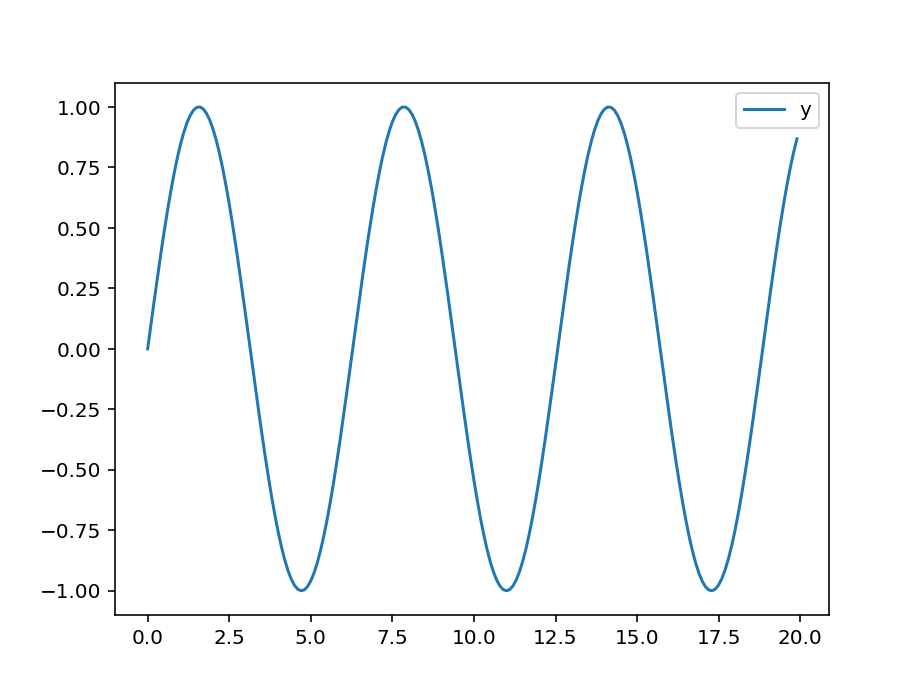

In [8]:
i = pn.interact(sine, n=(5, 100))
pn.Row(i[1][0], pn.Column("<br>\n### Sine waves", i[0][0], i[0][1]))

In [9]:
layout = interact(f, x=10)

pn.Column('**A custom interact layout**', pn.Row(layout[0], layout[1]))

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] IntSlider(end=30, name='x', start=-10, value=10)
        [1] Row
            [0] Str(int, name='interactive00286')

## Argumente festlegen mit `fixed`

Es kann vorkommen, dass ihr eine Funktion mithilfe von `interact` untersuchen möchtet, aber eines oder mehrere ihrer Argumente auf bestimmte Werte festlegen möchtet. Dies kann durch die `fixed`-Funktion erreicht werden:

In [10]:
def h(p, q):
    return (p, q)

In [11]:
interact(h, p=5, q=fixed(20))

Column
    [0] Column
        [0] IntSlider(end=15, name='p', start=-5, value=5)
    [1] Row
        [0] Str(tuple, name='interactive00330')

## *Widget Abbreviations*

Wenn ihr bestimmte Werte übergebt, verwendet `interact` automatisch das passende Widget, z.B. eine Checkbox für `True` oder den `IntSlider` für ganzzahlige Werte. Ihr müsst also nicht explizit das passende Widget angeben:

In [12]:
interact(f, x=widgets.FloatSlider(start=0.0,end=10.0,step=0.01,value=3.0))

Column
    [0] Column
        [0] FloatSlider(end=10.0, step=0.01, value=3.0)
    [1] Row
        [0] Str(float, name='interactive00362')

In [13]:
interact(f, x=(0.0,10.0,0.01,3.0))

Column
    [0] Column
        [0] FloatSlider(end=10.0, name='x', step=0.01, value=3.0)
    [1] Row
        [0] Str(float, name='interactive00388')

Dieses Beispiel verdeutlicht, wie `interact` die Schlüsselwortargumente verarbeitet werden:

1. Wenn das Schlüsselwortargument eine `Widget`-Instanz mit einem `value`-Attribut ist, wird dieses Widget verwendet. Dabei kann jedes Widget mit einem `value`-Attribut verwendet werden, auch benutzerdefinierte.
2. Andernfalls wird der Wert als *Widget Abbreviation* behandelt, die vor der Verwendung in ein Widget konvertiert wird.

Die folgende Tabelle gibt einen Überblick über verschiedene *Widget Abbreviations*:

| Keyword argument                                    | Widget        |
|:----------------------------------------------------|:--------------|
| `True` oder `False`                                 | `Checkbox`    |
| `'Hi Pythonistas!'`                                 | `Text`        |
| Ganzzahliger Wert als `min`, `max`,`step`, `value`  | `IntSlider`   |
| Gleitkommazahl als `min`, `max`,`step`, `value`     | `FloatSlider` |
| `['apple','pear']` oder `{'one':1,'two':2}`         | `Dropdown`    |